В конце 2022 года биткоин сильно просел. Не будет углубляться в причины этого, а лишь проведем анализ. Покажем, как объем торгов влияет на цену биткоина

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
btc = pd.read_csv('/Users/admin/Downloads/Binance_BTCUSDT_2022_minute.csv')

Для начала изучим датафрейм, проверим, что с ним все хорошо. Нет пропусков, все типы данных нам подходят

In [3]:
btc.head()

,unix,date,symbol,open,high,low,close,volume,volume_from,tradecount
0,1672531140000,2022-12-31 23:59:00,BTCUSDT,16536.81,16544.47,16536.23,16542.40,69.99944,1.157778e+06,2536
1,1672531080000,2022-12-31 23:58:00,BTCUSDT,16537.78,16538.81,16536.42,16536.42,28.88239,4.776434e+05,1267
2,1672531020000,2022-12-31 23:57:00,BTCUSDT,16540.52,16540.79,16535.05,16537.78,53.35978,8.824495e+05,2088
3,1672530960000,2022-12-31 23:56:00,BTCUSDT,16538.65,16540.53,16538.38,16540.52,38.58840,6.382267e+05,1536
4,1672530900000,2022-12-31 23:55:00,BTCUSDT,16540.42,16540.92,16537.71,16539.28,36.23683,5.993276e+05,1551


Присвоим индекс равный unix. Для рассчетов нам это не нужно, но для красоты сделаем

In [4]:
btc.index=btc['unix']
del btc['unix']


In [5]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525600 entries, 1672531140000 to 1640995200000
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         525600 non-null  object 
 1   symbol       525600 non-null  object 
 2   open         525600 non-null  float64
 3   high         525600 non-null  float64
 4   low          525600 non-null  float64
 5   close        525600 non-null  float64
 6   volume       525600 non-null  float64
 7   volume_from  525600 non-null  float64
 8   tradecount   525600 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 40.1+ MB


In [6]:
btc['date']=btc['date'].astype('datetime64[ns]')

Я не буду делать визуализацию поминутно, так как это слишком просто. Сделаем визуализацию по дням. Для этого сделаем группировку по дням. Будем считать сумму объема и среднюю цену

In [7]:
btc['day']=btc['date'].dt.to_period('D')


In [8]:
grouped_per_day=btc.groupby(btc['day']).agg({
    'open': 'mean',
    'volume': 'sum'}).reset_index()
grouped_per_day['day']=grouped_per_day['day'].astype('str')
grouped_per_day



,day,open,volume
0,2022-01-01,47116.390104,19604.46325
1,2022-01-02,47237.357056,18340.46040
2,2022-01-03,46814.517062,27662.07710
3,2022-01-04,46428.986882,35491.41360
4,2022-01-05,45901.627431,51784.11857
...,...,...,...
360,2022-12-27,16803.869382,173749.58616
361,2022-12-28,16636.774042,193037.56577
362,2022-12-29,16591.406250,160998.47158
363,2022-12-30,16548.258729,164916.31174


Посмотрим как изменялась цена в течении года

<Axes: xlabel='day', ylabel='open'>

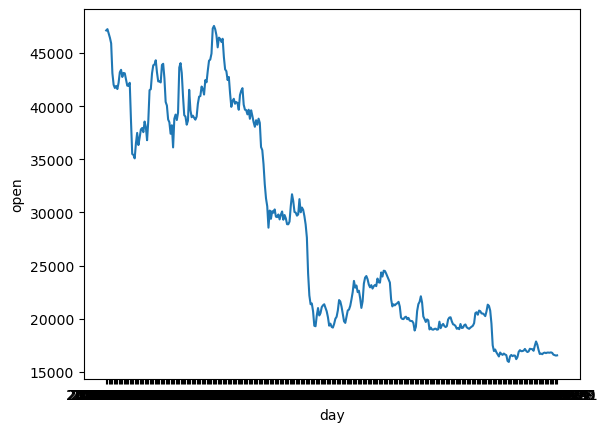

In [9]:
sns.lineplot(data=grouped_per_day, x='day', y='open')

Посмотрим как изменялся объем торгов в течении года

<Axes: xlabel='day', ylabel='volume'>

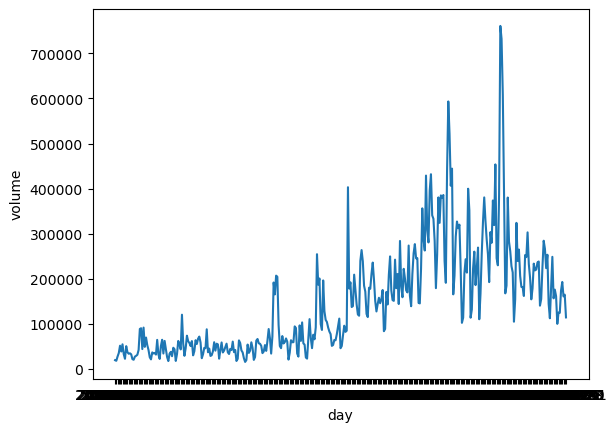

In [10]:
sns.lineplot(data=grouped_per_day, x='day', y='volume')

Визуализируем зависимость между стоимостью и объемом торгов с помощью скаттерплота и посчитаем коллеряцию ее значимость

<Axes: xlabel='open', ylabel='volume'>

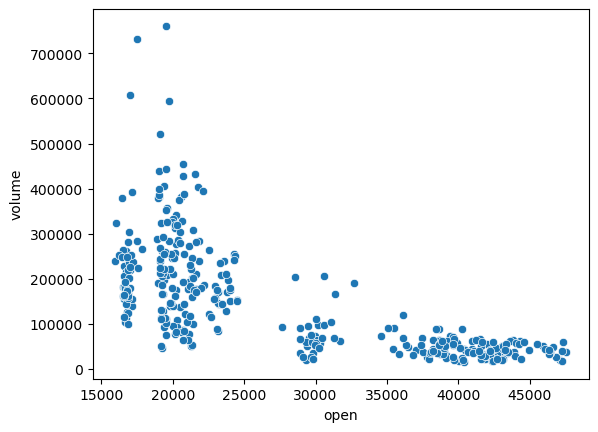

In [11]:
sns.scatterplot(data=grouped_per_day, x="open", y="volume")

In [12]:
pearsonr(grouped_per_day['open'],grouped_per_day['volume'])

PearsonRResult(statistic=-0.6850047527911048, pvalue=7.160439732556778e-52)

Так как p-value стремится к нулю, делаем вывод что корреляция значима. Корреляция между стоимостью биткоина и объемом его покупок отрицательная. Чем меньше стоит биткоин, тем больше его покупают. Хоть это и очевидно, но этим экспериментом мы доказали это

Целью эксперимента было показать мои скиллы. Если сделать тест более объективным, то ниже указана корреляция поминутно

<Axes: xlabel='open', ylabel='volume'>

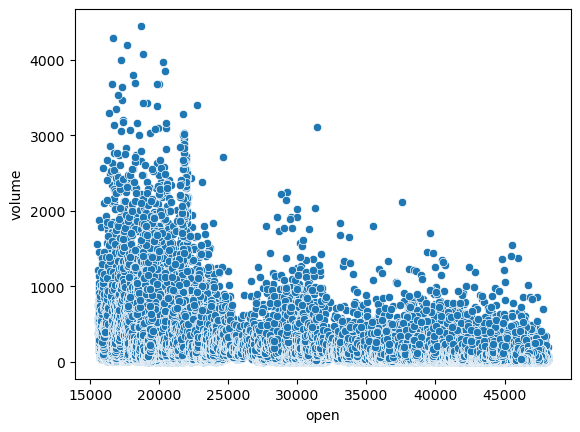

In [14]:
sns.scatterplot(data=btc, x="open", y="volume")

In [13]:
pearsonr(btc['open'],btc['volume'])

PearsonRResult(statistic=-0.40559754261486247, pvalue=0.0)